
## DNNs - solutions for overfitting
## Example - IMDB dataset



### Dataset description:
- Dataset with texts of reviews in IMDB about movies; classified into 2 classes: positive or negative
- 25k reviews for training + 25k for test; balanced – 50% positive and negative examples
- We will only consider the 10k words that are most common
- This dataset will be used here, considering a one-hot encoding scheme where the 10K most common words will be considered as binary features. So, if a word appears in a review the value of the feature will be 1, if not it will be 0
- Notice that in this way, the order of the words is neglected

### Loading the dataset

In [18]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data.shape, test_data.shape)
print(len(train_labels), len(test_labels))
print(train_data[0])
print(train_labels[0])

(25000,) (25000,)
25000 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


### Exploring and pre-processing the dataset

In [20]:
print(max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
print(decoded_review)

9999
? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [21]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Defining the model structure and training the model

In [26]:
from tensorflow.keras import models, layers, Input

hidden = 16

model = models.Sequential()
model.add(Input((10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Training the model and plotting errors along the process

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.6772 - loss: 0.6109 - val_acc: 0.8489 - val_loss: 0.4233
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8829 - loss: 0.3595 - val_acc: 0.8681 - val_loss: 0.3371
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9167 - loss: 0.2565 - val_acc: 0.8773 - val_loss: 0.3058
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9320 - loss: 0.2087 - val_acc: 0.8888 - val_loss: 0.2823
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9448 - loss: 0.1715 - val_acc: 0.8895 - val_loss: 0.2757
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9533 - loss: 0.1464 - val_acc: 0.8874 - val_loss: 0.2795
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9639 - loss: 0.1207 - val_acc: 0.8816 - val_loss: 0.2974
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9710 - loss: 0.1031 - val_acc: 0.8840 - val_loss: 0.3026
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9715 - loss

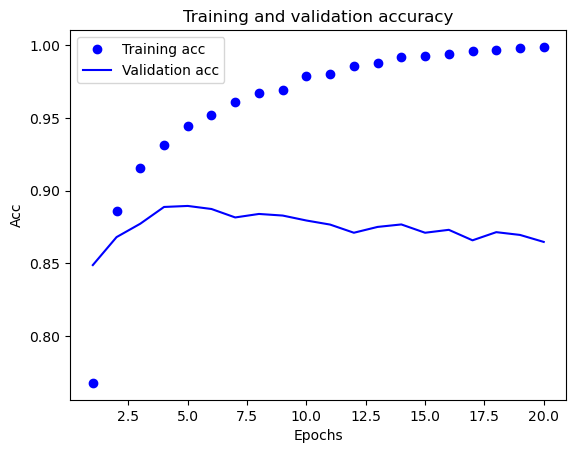

In [31]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


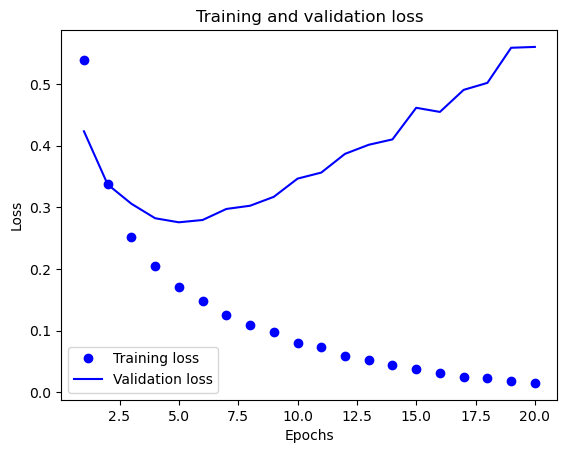

In [33]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predicting for the test set and calculating errors

In [36]:
preds = model.predict(x_test) # probabilities
class_preds = preds > 0.5

print(preds[0:5])
class_preds[0:5]

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
[[0.00544537]
 [0.99999946]
 [0.10845936]
 [0.8024382 ]
 [0.9904742 ]]


array([[False],
       [ True],
       [False],
       [ True],
       [ True]])

In [37]:
results = model.evaluate(x_test, y_test, verbose = 0)
results

[0.6099272966384888, 0.8548399806022644]

### Overfitting 

#### Controlling capacity of the model

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5739 - loss: 0.6682 - val_acc: 0.7348 - val_loss: 0.5883
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7615 - loss: 0.5673 - val_acc: 0.7960 - val_loss: 0.5408
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8266 - loss: 0.5189 - val_acc: 0.8586 - val_loss: 0.5136
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8690 - loss: 0.4788 - val_acc: 0.8523 - val_loss: 0.4902
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8910 - loss: 0.4497 - val_acc: 0.8738 - val_loss: 0.4759
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9102 - loss: 0.4334 - val_acc: 0.8410 - val_loss: 0.4717
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9190 - loss: 0.4110 - val_acc: 0.8516 - val_loss: 0.4622
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9286 - loss: 0.3928 - val_acc: 0.8564 - val_loss: 0.4573
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9327 - loss:

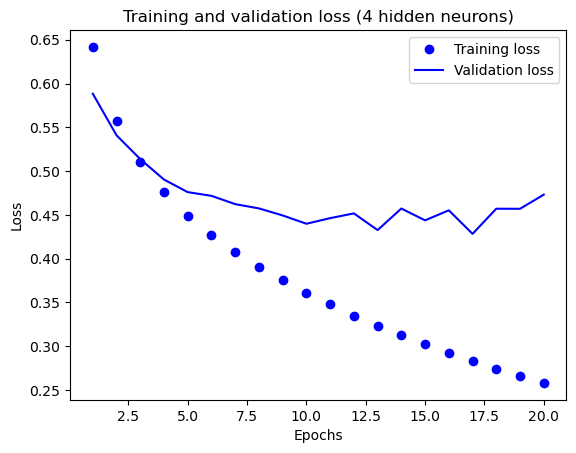

In [42]:
hidden = 4

model2 = models.Sequential()
model2.add(Input((10000,)))
model2.add(layers.Dense(hidden, activation='relu'))
model2.add(layers.Dense(hidden, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results2 = model2.evaluate(x_test, y_test, verbose = 0)
print(results2)

history_dict2 = history2.history
loss_values2 = history_dict2['loss'] 
val_loss_values2 = history_dict2['val_loss']

plt.plot(epochs, loss_values2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss (4 hidden neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.6629 - loss: 0.5964 - val_acc: 0.8723 - val_loss: 0.3524
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8892 - loss: 0.3071 - val_acc: 0.8868 - val_loss: 0.2886
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9130 - loss: 0.2308 - val_acc: 0.8745 - val_loss: 0.3100
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9210 - loss: 0.2063 - val_acc: 0.8873 - val_loss: 0.2774
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9504 - loss: 0.1435 - val_acc: 0.8808 - val_loss: 0.3114
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9581 - loss: 0.1217 - val_acc: 0.8549 - val_loss: 0.3952
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9653 - loss: 0.1037 - val_acc: 0.8825 - val_loss: 0.3226
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9797 - loss: 0.0734 - val_acc: 0.8677 - val_loss: 0.3937
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9824

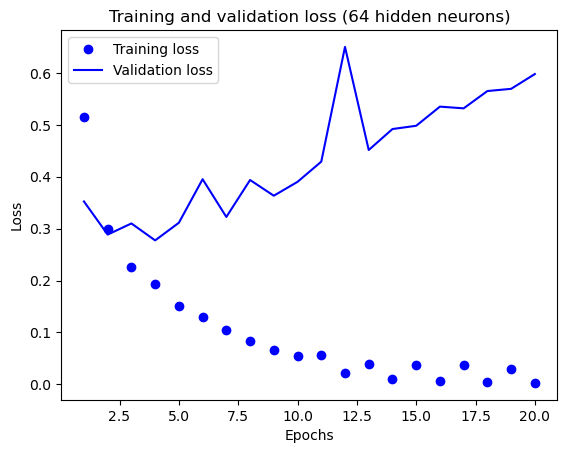

In [43]:
hidden = 64

model3 = models.Sequential()
model3.add(Input((10000,)))
model3.add(layers.Dense(hidden, activation='relu'))
model3.add(layers.Dense(hidden, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


results3 = model3.evaluate(x_test, y_test, verbose = 0)
print(results3)

history_dict3 = history3.history
loss_values3 = history_dict3['loss'] 
val_loss_values3 = history_dict3['val_loss']

plt.plot(epochs, loss_values3, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values3, 'b', label='Validation loss')
plt.title('Training and validation loss (64 hidden neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### L2 regularization 

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.6918 - loss: 0.7045 - val_acc: 0.8401 - val_loss: 0.5163
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8890 - loss: 0.4515 - val_acc: 0.8822 - val_loss: 0.4014
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9117 - loss: 0.3511 - val_acc: 0.8895 - val_loss: 0.3673
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9185 - loss: 0.3095 - val_acc: 0.8854 - val_loss: 0.3582
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9337 - loss: 0.2783 - val_acc: 0.8868 - val_loss: 0.3537
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9419 - loss: 0.2573 - val_acc: 0.8815 - val_loss: 0.3690
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9480 - loss: 0.2422 - val_acc: 0.8847 - val_loss: 0.3588
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9516 - loss: 0.2333 - val_acc: 0.8831 - val_loss: 0.3645
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9531 - loss:

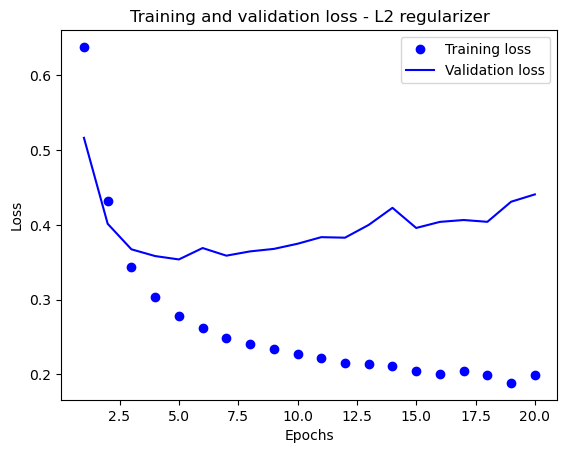

[0.45730140805244446, 0.8626800179481506]

In [47]:
from tensorflow.keras import regularizers

hidden = 16

model_l2 = models.Sequential()
model_l2.add(Input((10000,)))
model_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model_l2.add(layers.Dense(1, activation='sigmoid'))

model_l2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_l2_dict = history_l2.history
loss_values_l2 = history_l2_dict['loss'] 
val_loss_values_l2 = history_l2_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values_l2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_l2, 'b', label='Validation loss')
plt.title('Training and validation loss - L2 regularizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_l2 = model_l2.evaluate(x_test, y_test, verbose = 0)
results_l2

#### Dropout

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5817 - loss: 0.6651 - val_acc: 0.8379 - val_loss: 0.5196
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7586 - loss: 0.5243 - val_acc: 0.8711 - val_loss: 0.3998
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8209 - loss: 0.4348 - val_acc: 0.8824 - val_loss: 0.3352
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8564 - loss: 0.3726 - val_acc: 0.8841 - val_loss: 0.3086
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8873 - loss: 0.3124 - val_acc: 0.8873 - val_loss: 0.2817
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9007 - loss: 0.2796 - val_acc: 0.8894 - val_loss: 0.2755
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9178 - loss: 0.2461 - val_acc: 0.8884 - val_loss: 0.2772
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9286 - loss: 0.2170 - val_acc: 0.8897 - val_loss: 0.2802
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9331 - los

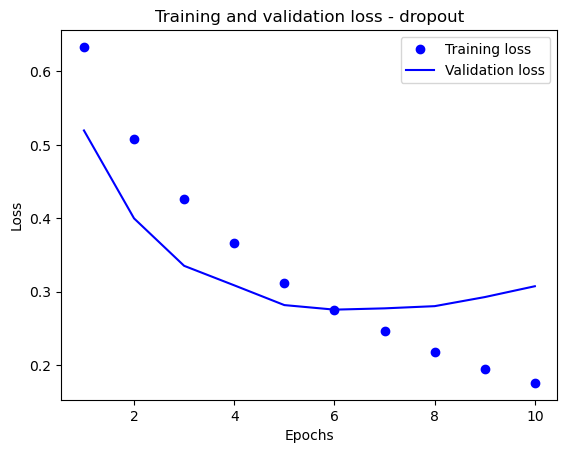

[0.32603704929351807, 0.8805599808692932]

In [50]:
model_dr = models.Sequential()
model_dr.add(Input((10000,)))
model_dr.add(layers.Dense(hidden, activation='relu'))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(hidden, activation='relu'))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(1, activation='sigmoid'))

model_dr.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_dr = model_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dr_dict = history_dr.history
loss_values_dr = history_dr_dict['loss'] 
val_loss_values_dr = history_dr_dict['val_loss']
epochs = range(1, len(loss_values_dr) + 1)

plt.plot(epochs, loss_values_dr, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_dr, 'b', label='Validation loss')
plt.title('Training and validation loss - dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_dr = model_dr.evaluate(x_test, y_test, verbose = 0)
results_dr

#### Early Stopping

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.6662 - loss: 0.6014 - val_acc: 0.8695 - val_loss: 0.3974
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8935 - loss: 0.3382 - val_acc: 0.8813 - val_loss: 0.3207
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9205 - loss: 0.2463 - val_acc: 0.8897 - val_loss: 0.2831
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9392 - loss: 0.1958 - val_acc: 0.8888 - val_loss: 0.2791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9528 - loss: 0.1600 - val_acc: 0.8846 - val_loss: 0.2891
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9607 - loss: 0.1333 - val_acc: 0.8847 - val_loss: 0.2923
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9646 - loss: 0.1189 - val_acc: 0.8732 - val_loss: 0.3348
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9696 - loss: 0.1012 - val_acc: 0.8809 - val_loss: 0.3106
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9783 - loss:

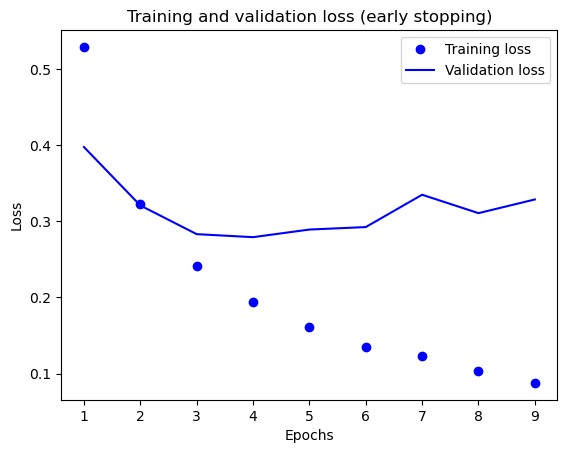

[0.35323023796081543, 0.8715599775314331]

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

hidden = 16

model = models.Sequential()
model.add(Input((10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

early = EarlyStopping(monitor='val_loss', min_delta=0, patience= 5, verbose= True, mode='auto')

callbacks = [early]
history_es = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks = callbacks)

history_dict_es = history_es.history
loss_values_es = history_dict_es['loss'] 
val_loss_values_es = history_dict_es['val_loss']
epochs = range(1, len(loss_values_es) + 1)

plt.plot(epochs, loss_values_es, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_es, 'b', label='Validation loss')
plt.title('Training and validation loss (early stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_es = model.evaluate(x_test, y_test, verbose = 0)
results_es